In [1]:
%cd ..

C:\Users\Brown Research\Documents\vr-exoskeleton


# evaluate

In [2]:
import os

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

from vr_exoskeleton import data_utils

## Load predictions

In [9]:
stamp = '1727977493_mlp_exo-90hz-delta-h32_32_s23'

users, X, Y, Y_hat = (np.load(os.path.join('output', stamp, f'test_{suffix}.npy'), allow_pickle=True)
                      for suffix in ['users', 'input', 'head_actual', 'head_predicted'])
print(users)
print('X:', X.shape)
print('Y:', Y.shape)
print('Y_hat:', Y_hat.shape)

['User10' 'User17' 'User1' 'User18' 'User16']
X: (485460, 27)
Y: (485460, 3)
Y_hat: (485460, 3)


In [10]:
if len(X.shape) == 3:  # LSTM
    sequence_Y = Y[:, 0]
    sequence_Y_hat = Y_hat[:, 0]
else:
    sequence_Y = Y
    sequence_Y_hat = Y_hat

sequence_Y[:10]

array([[-7.2650611e-05, -8.8900328e-05,  1.9907951e-05],
       [ 9.1172755e-05,  2.3901463e-04, -6.0081482e-05],
       [ 1.0652840e-04,  8.5830688e-06,  4.4107437e-06],
       [ 3.7461892e-04,  6.3630939e-04, -1.5211105e-04],
       [ 4.5796111e-04,  5.6558847e-04, -1.2779236e-04],
       [ 5.0729141e-04,  7.6460838e-04, -1.8072128e-04],
       [ 4.1316077e-04,  8.1029534e-04, -2.0009279e-04],
       [ 5.3793937e-04,  9.9208951e-04, -2.4431944e-04],
       [ 6.4192712e-04,  6.7231059e-04, -1.4948845e-04],
       [ 4.8315153e-04,  8.0949068e-04, -1.9860268e-04]], dtype=float32)

In [11]:
sequence_Y_hat[:10]

array([[-2.1884963e-04,  2.6486441e-04,  5.4545514e-04],
       [-6.5138564e-05,  3.5821646e-04,  5.4079853e-04],
       [-6.2034465e-05,  4.3147430e-04,  5.2193366e-04],
       [-7.7635050e-06,  6.7363307e-04,  4.6634115e-04],
       [ 9.1239344e-05,  6.6100433e-04,  4.8247725e-04],
       [ 2.8283196e-04,  9.2783198e-04,  4.3962523e-04],
       [ 4.3534860e-04,  1.1357963e-03,  3.8458407e-04],
       [ 4.7960551e-04,  1.2348406e-03,  3.5234168e-04],
       [ 4.5553269e-04,  1.3569891e-03,  3.0043162e-04],
       [ 4.8534386e-04,  1.4615804e-03,  2.5937892e-04]], dtype=float32)

## Plot trajectories

In [12]:
rng = np.random.default_rng(seed=1)
steps_max = 2 ** 11
# offset = 10801 * 11

In [19]:
def plot_actual_predicted(X, Y, Y_hat):
    fig, axes = plt.subplots(6, 1, figsize=(12, 16))
    if len(Y.shape) == 3:  # LSTM
        sequence_index = rng.integers(X.shape[1])
        X_sample = X[:, sequence_index]
        Y_sample = Y[:, sequence_index]
        Y_hat_sample = Y_hat[:, sequence_index]
        print(f'X[:, sequence_index={sequence_index}]')
        print(f'Y[:, sequence_index={sequence_index}]')
        print(f'Y_hat[:, sequence_index={sequence_index}]')
    else:
        offset = rng.integers(Y.shape[0] - steps_max)
        X_sample = X[offset:offset + steps_max]
        Y_sample = Y[offset:offset + steps_max]
        Y_hat_sample = Y_hat[offset:offset + steps_max]
        print(f'X[{offset}:{offset + steps_max}]')
        print(f'Y[{offset}:{offset + steps_max}]')
        print(f'Y_hat[{offset}:{offset + steps_max}]')

    ax_names = ['X', 'Y', 'Z']
    for i in range(3):
        axes[i].plot(X_sample[:, i], label='Left')
        axes[i].plot(X_sample[:, i + 3], label='Right')
        # side = 'L' if i < 3 else 'R'
        axes[i].set_title(f'Eye - {ax_names[i]}')
        axes[i].legend()
    for i in range(3, 6):
        y = Y_sample[:, i - 3]
        y_hat = Y_hat_sample[:, i - 3]
        axes[i].plot(y, label='Actual', color='red')
        axes[i].plot(y_hat, label='Predicted', color='purple')
        axes[i].set_title(f'Neck Prediction - {ax_names[i - 3]}')
        axes[i].legend()
    plt.tight_layout()
    plt.show()

X[16848:18896]
Y[16848:18896]
Y_hat[16848:18896]


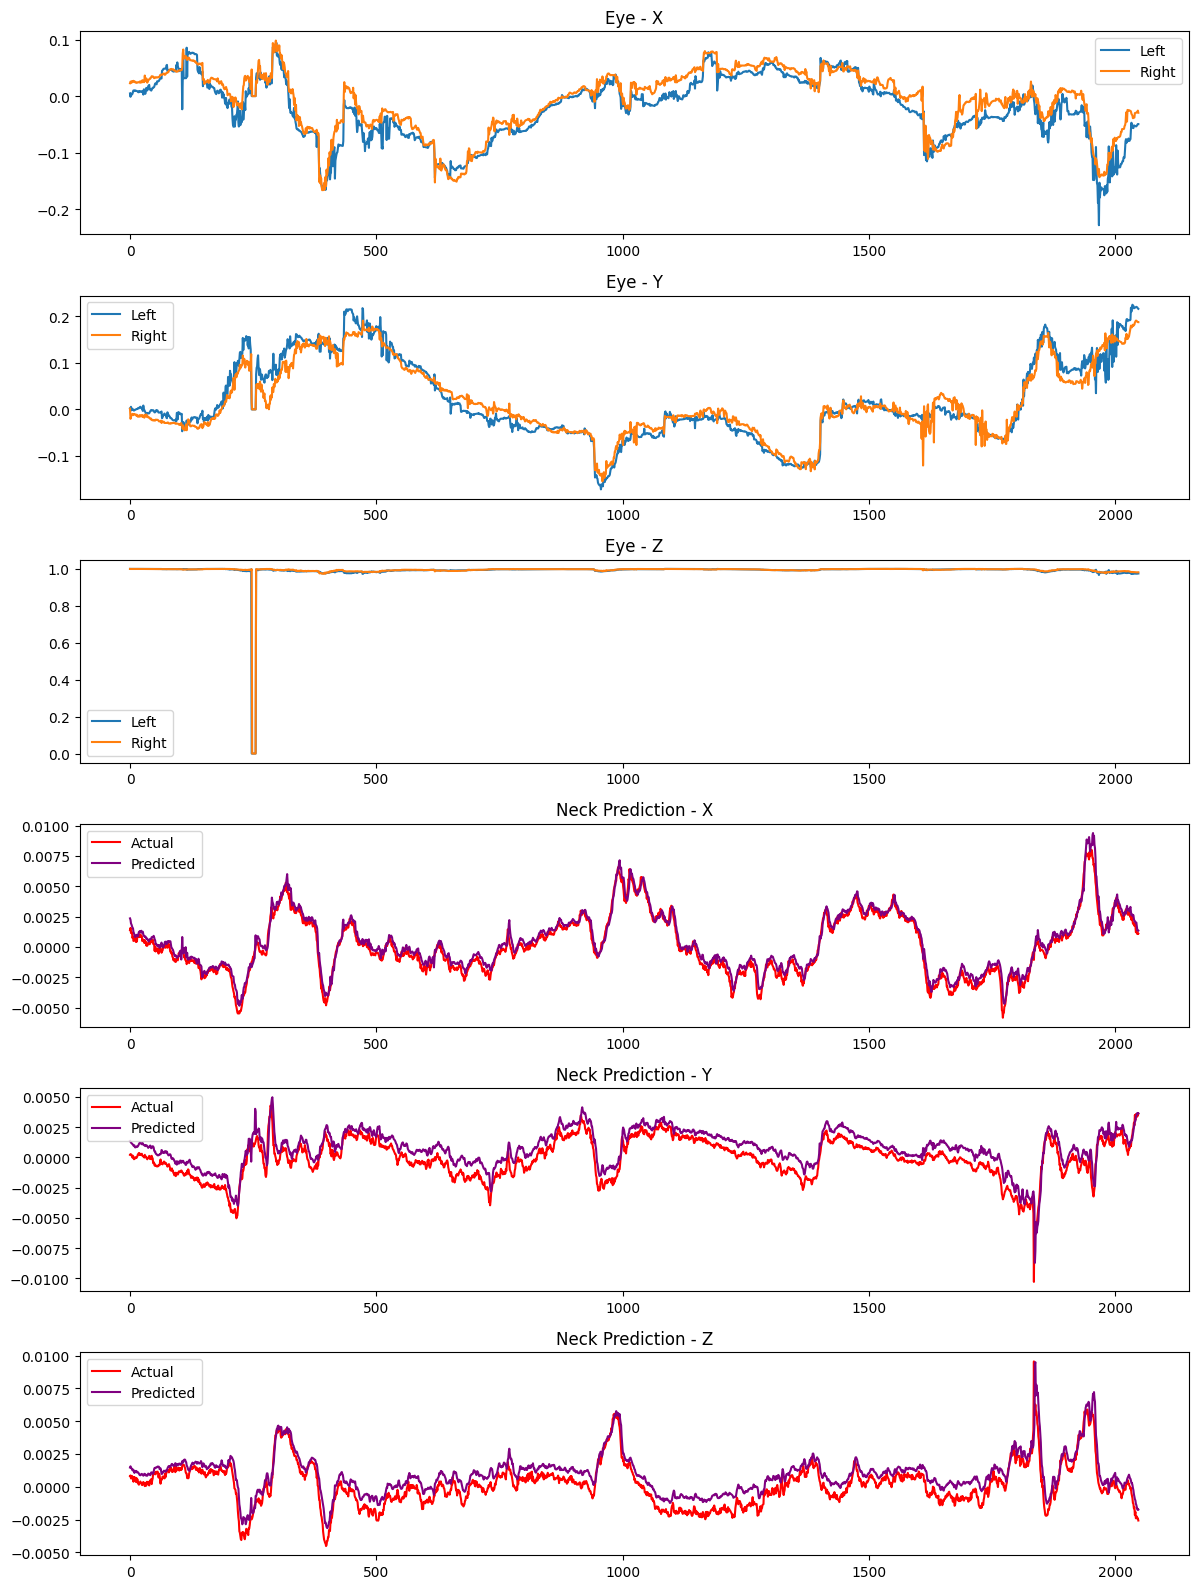

In [21]:
plot_actual_predicted(X, Y, Y_hat)